<a href="https://colab.research.google.com/github/vitroid/GenIce/blob/genice3/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

On Google Colaboratory, you must install GenIce2 and extra plugins by yourself.


In [2]:
try:
    import google.colab
    %pip install git+https://github.com/vitroid/GenIce.git@genice2 git+https://github.com/vitroid/genice2-svg.git
except:
    %pip install --no-deps ../genice3-svg svgwrite
    pass


Processing /Volumes/Caches/Dropbox/gitbox/genice3-svg
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-svg: filename=genice3_svg-0.1.0-py2.py3-none-any.whl size=11506 sha256=1d59a04fc115a7878c53e712066b69435e25679bd093a22e0371e992ef66d7f3
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/b4/58/ce/84c02990dc12609c55edd7ab11cabff73127c66688d78026d0
Successfully built genice3-svg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [svgwrite]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Output in Gromacs format.

A simplest example.


In [1]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter, Molecule

genice = GenIce3()
genice.unitcell = UnitCell("ice11")
Exporter("gromacs", water_model=Molecule("spce")).dump(genice)

Generated by GenIce https://github.com/vitroid/GenIce 
48
    1SOL      O    1   0.220  -0.003   0.095
    1SOL      H    2   0.299  -0.044   0.062
    1SOL      H    3   0.224   0.087   0.062
    2SOL      O    4   0.220   0.256   0.004
    2SOL      H    5   0.299   0.302   0.032
    2SOL      H    6   0.224   0.259  -0.092
    3SOL      O    7   0.229   0.003   0.371
    3SOL      H    8   0.150  -0.043   0.399
    3SOL      H    9   0.226   0.001   0.275
    4SOL      O   10   0.229   0.262   0.462
    4SOL      H   11   0.150   0.303   0.428
    4SOL      H   12   0.226   0.172   0.428
    5SOL      O   13   0.669  -0.003   0.095
    5SOL      H   14   0.673   0.087   0.062
    5SOL      H   15   0.748  -0.044   0.062
    6SOL      O   16   0.669   0.256   0.004
    6SOL      H   17   0.673   0.259  -0.092
    6SOL      H   18   0.748   0.302   0.032
    7SOL      O   19   0.678   0.003   0.371
    7SOL      H   20   0.599  -0.043   0.399
    7SOL      H   21   0.675   0.001   0.2

You can also invoke the plugins directly, instead of loading via the loaders such as `UnitCell` or `Exporter`.


In [2]:
from genice3.genice import GenIce3
from genice3.exporter.gromacs import dump
from genice3.unitcell.ice11 import UnitCell as ice11

genice = GenIce3(unitcell=ice11())
dump(genice, water_model="4site")

Generated by GenIce https://github.com/vitroid/GenIce 
64
    1ICE     OW    1   0.220  -0.003   0.095
    1ICE    HW1    2   0.299  -0.044   0.062
    1ICE    HW2    3   0.224   0.087   0.062
    1ICE     MW    4   0.231   0.003   0.087
    2ICE     OW    5   0.220   0.256   0.004
    2ICE    HW1    6   0.299   0.302   0.032
    2ICE    HW2    7   0.224   0.259  -0.092
    2ICE     MW    8   0.231   0.263  -0.005
    3ICE     OW    9   0.229   0.003   0.371
    3ICE    HW1   10   0.150  -0.043   0.399
    3ICE    HW2   11   0.226   0.001   0.275
    3ICE     MW   12   0.219  -0.003   0.362
    4ICE     OW   13   0.229   0.262   0.462
    4ICE    HW1   14   0.150   0.303   0.428
    4ICE    HW2   15   0.226   0.172   0.428
    4ICE     MW   16   0.219   0.256   0.454
    5ICE     OW   17   0.669  -0.003   0.095
    5ICE    HW1   18   0.673   0.087   0.062
    5ICE    HW2   19   0.748  -0.044   0.062
    5ICE     MW   20   0.680   0.003   0.087
    6ICE     OW   21   0.669   0.256   0.0

## Generate an SVG image

Here we are using the Forms syntax of Google Colab to choose the ice type.


INFO:root:original_density=np.float64(0.5340861864563906)
INFO:root:The HB graph is generated from the bond length: 0.3308041
INFO:root:density=np.float64(0.5340861864563906) specified.
INFO:root:scale=np.float64(1.0)
INFO:root:Extra exporter plugin: svg
INFO:root:options.rotate: ['y5', 'x5']
INFO:DependencyEngine:Executing: cell
INFO:DependencyEngine:0.0000 sec for cell
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0003 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0001 sec for lattice_sites
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0000 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.0029 sec for graph


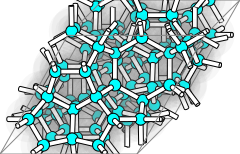

In [3]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO
from IPython.display import SVG, display

ice = "DDR"  # @param ["ice1h", "ice2", "ice3", "DDR"] {allow-input: true}

basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell(ice)
svg = Exporter("svg").dumps(genice, shadow=True, rotate="y5,x5")
display(SVG(svg))

## Generate a PNG image

PNG renderer is also included in genice_svg package.


INFO:root:original_density=np.float64(0.01700919011988991)
INFO:root:The HB graph is generated from the bond length: 1.1
INFO:root:density=0.81 specified.
INFO:root:scale=np.float64(3.624658770006385)
INFO:root:Extra exporter plugin: png
INFO:root:options.rotate: ['y5', 'x5']
INFO:DependencyEngine:Executing: cell
INFO:DependencyEngine:0.0000 sec for cell
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0005 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0001 sec for lattice_sites
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0000 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.0606 sec for graph


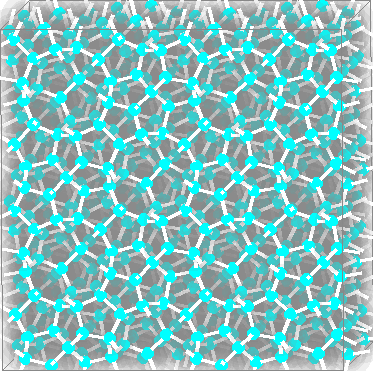

In [4]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO
from IPython.display import SVG, display


basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell("CS2")
genice.replication_matrix = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]
png = Exporter("png").dumps(
    genice, shadow="#8882", encode=False, bgcolor="#fff", rotate="y5,x5"
)
png

## Store the image in a file

Save it in a PNG file.


In [5]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, basicConfig, INFO

basicConfig(level=INFO)
genice = GenIce3()
genice.unitcell = UnitCell("ice3")
genice.replication_matrix = [[2, 0, 0], [0, 2, 0], [0, 0, 2]]
with open("ice3.png", "wb") as f:
    Exporter("png").dump(genice, f, shadow="#8882", bgcolor="#fff", rotate="y5,x5")

INFO:root:original_density=np.float64(0.0011637864512692793)
INFO:root:The HB graph is generated from the bond length: 3.0
INFO:root:density=1.165 specified.
INFO:root:scale=np.float64(10.003474655682915)
INFO:root:Extra exporter plugin: png
INFO:root:options.rotate: ['y5', 'x5']
INFO:DependencyEngine:Executing: cell
INFO:DependencyEngine:0.0000 sec for cell
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0005 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0001 sec for lattice_sites
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0000 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.0010 sec for graph


## Analysis

Some statistical analyses are also available.


INFO:root:original_density=np.float64(0.0037363002324809053)
INFO:root:density=0.92 specified.
INFO:root:scale=np.float64(6.26780322426606)
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0006 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0001 sec for lattice_sites
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0001 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.0015 sec for graph
INFO:DependencyEngine:Executing: fixedEdges
INFO:DependencyEngine:0.0002 sec for fixedEdges
INFO:DependencyEngine:Executing: digraph
INFO:root:Depol. loop 45: [0. 0. 0.]
INFO:DependencyEngine:0.0071 sec for digraph
INFO:DependencyEngine:Executing: cell
INFO:DependencyEngine:0.0001 sec for cell
INFO:DependencyEngine:Executing: anions
INFO:DependencyEngine:0.0000 sec for anions
INFO:DependencyEngine:Executing: cations
INFO:DependencyEngine:0.0000 sec for cations

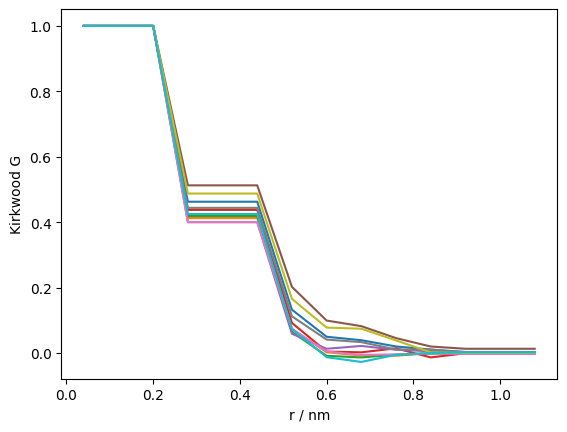

In [6]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
import numpy as np
from matplotlib import pyplot as plt
import random

genice = GenIce3(replication_matrix=[[2,0,0],[0,2,0],[0,0,2]])
genice.unitcell = UnitCell("ice1c")
for seed in range(1000, 1010):
    genice.seed = seed
    kg = Exporter("_KG").calculate(genice)
    plt.plot(kg[:, 0], kg[:, 1])

plt.xlabel("r / nm")
plt.ylabel("Kirkwood G")
plt.show()

## Logging

You may want to see the process log.


In [7]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter
from logging import getLogger, INFO, DEBUG, WARNING, basicConfig

basicConfig(level=INFO)
logger = getLogger()

genice = GenIce3(replication_matrix=[[16, 0, 0], [0, 16, 0], [0, 0, 16]])
genice.unitcell = UnitCell("ice1c")
gro = Exporter("gromacs", water_model="spce").dumps(genice)
with open("ice1c.gro", "w") as f:
    f.write(gro)

logger.setLevel(WARNING)

INFO:root:original_density=np.float64(0.0037363002324809053)
INFO:root:density=0.92 specified.
INFO:root:scale=np.float64(6.26780322426606)
INFO:guest_processor:arg={}
INFO:DependencyEngine:Executing: replica_vectors
INFO:DependencyEngine:0.0237 sec for replica_vectors
INFO:DependencyEngine:Executing: lattice_sites
INFO:DependencyEngine:0.0191 sec for lattice_sites
INFO:DependencyEngine:Executing: anions
INFO:DependencyEngine:0.0000 sec for anions
INFO:DependencyEngine:Executing: cations
INFO:DependencyEngine:0.0000 sec for cations
INFO:DependencyEngine:Executing: site_occupants
INFO:DependencyEngine:0.0000 sec for site_occupants
INFO:DependencyEngine:Executing: replica_vector_labels
INFO:DependencyEngine:0.0036 sec for replica_vector_labels
INFO:DependencyEngine:Executing: graph
INFO:DependencyEngine:0.4922 sec for graph
INFO:DependencyEngine:Executing: fixedEdges
INFO:DependencyEngine:0.0495 sec for fixedEdges
INFO:DependencyEngine:Executing: digraph
INFO:root:Depol. loop 412: [0. 0.

## Raw data

You can access the "raw" (internal) data.


In [8]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell

genice = GenIce3()
genice.unitcell = UnitCell("xFAU", rep=3)
genice.lattice_sites

ユーザーが参照できる変数、設定できるReactiveな変数を列挙する。

SyntaxError: invalid character '、' (U+3001) (621016131.py, line 8)

### Visualization by Plotly

Use the raw data to plot by yourself.


In [9]:
waters = genice.lattice_sites  # cached; no additional calculation
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=waters[:, 0],
            y=waters[:, 1],
            z=waters[:, 2],
            marker=dict(size=10),
            mode="markers",
        )
    ]
)
fig.show()

## Integration with py3Dmol.

Py3Dmol works on Google Colaboratory.


In [10]:
try:
    import google.colab
    %pip install git+https://github.com/vitroid/genice3-py3dmol.git
except:
    %pip install --no-deps ../genice3-py3dmol py3dmol
    pass


Processing /Volumes/Caches/Dropbox/gitbox/genice3-py3dmol
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-py3dmol: filename=genice3_py3dmol-0.1.0-py2.py3-none-any.whl size=3296 sha256=bfc3338f04a1733d9e9d1cccdd5b0199e9a04786c87f05e626f542fc8a48905f
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/f9/9f/2e/4f52b2c6dd5ded0f5f6790f3b0d2237afb2bd9556c7b541c21
Successfully built genice3-py3dmol
  Attempting uninstall: genice3-py3dmol
    Found existing installation: genice3-py3dmol 0.1.0
    Uninstalling genice3-py3dmol-0.1.0:
      Successfully uninstalled genice3-py3dmol-0.1.0

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=0))
Exporter("plotly").figure(genice).show(type="fixed")


In [1]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=0))
Exporter("py3dmol").get_view(genice, water_model="3site").show()

NetworkXError: The edge 7-48 not in graph.

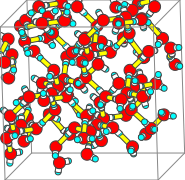

In [19]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("xFAU", rep=0))
svg = Exporter("svg").dumps(genice, water_model="3site", rotate="y10,x10", hydrogen=0.5)
display(SVG(svg))

## Interaction with MDAnalysis


In [22]:
try:
    import google.colab
    %pip install git+https://github.com/vitroid/genice3-mdanalysis.git
except:
    %pip install --no-deps ../genice3-mdanalysis
    %pip install MDAnalysis


Processing /Volumes/Caches/Dropbox/gitbox/genice3-mdanalysis
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genice3-mdanalysis: filename=genice3_mdanalysis-0.1.0-py2.py3-none-any.whl size=3399 sha256=dd85b2f4abaae9d351017b11aabf9acecff3c61c38d52e62ff8db94dc1dbfe51
  Stored in directory: /Users/matto/Library/Caches/pip/wheels/20/81/a3/87561216e0742984c67be1780fa55967f1f5f23e0438be3da3
Successfully built genice3-mdanalysis
  Attempting uninstall: genice3-mdanalysis
    Found existing installation: genice3-mdanalysis 0.1.0
    Uninstalling genice3-mdanalysis-0.1.0:
      Successfully uninstalled genice3-mdanalysis-0.1.0

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━

In [23]:
from genice3.genice import GenIce3
from genice3.plugin import UnitCell, Exporter

genice = GenIce3(unitcell=UnitCell("ice1h_unit"))
universe = Exporter("mdanalysis").get_universe(genice, water_model="4site")
# Save as a .pdb file.
allatoms = universe.select_atoms("all")
allatoms.write("1h_unit.pdb")

/Volumes/Caches/Dropbox/gitbox/GenIce2/.venv/lib/python3.13/site-packages/MDAnalysis/lib/util.py:708: RuntimeWarning: Constructed NamedStream from a NamedStream
  warnings.warn(


KeyError: 'CHAIN'